In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/Data Glacier Internship/Week 2')

Mounted at /content/drive


In [ ]:
## data
import numpy as np
import pandas as pd

## visualisations
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale = 1.5)
## datetime
import datetime

## stats
from scipy import stats
!pip install scikit-posthocs
import scikit_posthocs as sp

## ignore warnings
import warnings
warnings.filterwarnings("ignore",module = "matplotlib\..*")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Load the data.**

In [ ]:
## Load data
cab_data = pd.read_csv('Cab_Data.csv')
city_data = pd.read_csv('City.csv')
customer_data = pd.read_csv('Customer_ID.csv')
transaction_data = pd.read_csv('Transaction_ID.csv')

**We take a brief look at each dataset and then we merge them.**

**Firstly, we merge the datasets cab_data and city_data.**

In [ ]:
cab_data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [ ]:
cab_data.shape

(359392, 7)

In [ ]:
len(cab_data['City'].unique())

19

In [ ]:
city_data.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [ ]:
city_data.shape

(20, 3)

In [ ]:
for city in city_data['City'].unique():
   if city in cab_data['City'].unique():
     print(city + str(' is in both datasets.'))
   else:
     print('-------------------------------------------------')
     print(city + str(' is not in the cab_data dataset.'))
     print('-------------------------------------------------')

NEW YORK NY is in both datasets.
CHICAGO IL is in both datasets.
LOS ANGELES CA is in both datasets.
MIAMI FL is in both datasets.
SILICON VALLEY is in both datasets.
ORANGE COUNTY is in both datasets.
SAN DIEGO CA is in both datasets.
PHOENIX AZ is in both datasets.
DALLAS TX is in both datasets.
ATLANTA GA is in both datasets.
DENVER CO is in both datasets.
AUSTIN TX is in both datasets.
SEATTLE WA is in both datasets.
TUCSON AZ is in both datasets.
-------------------------------------------------
SAN FRANCISCO CA is not in the cab_data dataset.
-------------------------------------------------
SACRAMENTO CA is in both datasets.
PITTSBURGH PA is in both datasets.
WASHINGTON DC is in both datasets.
NASHVILLE TN is in both datasets.
BOSTON MA is in both datasets.


- **One city (SAN FRANCISCO CA) is not in both datasets that have the `City' column.**

- **We merge the two datasets leaving SAN FRANCISCO CA out of the new dataset.**

In [ ]:
data = pd.merge(cab_data, city_data, on='City')
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


**Now, we merge the datasets customer_data and transaction_data.**

In [ ]:
customer_data.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [ ]:
customer_data.shape

(49171, 4)

In [ ]:
transaction_data.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [ ]:
transaction_data.shape

(440098, 3)

In [ ]:
print(len(customer_data['Customer ID'].unique()))
print(len(transaction_data['Customer ID'].unique()))

49171
49171


In [ ]:
np.sum(customer_data['Customer ID'].unique() == transaction_data['Customer ID'].unique())

49171

**It looks like the two datasets share the same Customer ID column, thus we merge on it.**

In [ ]:
id_data = pd.merge(transaction_data, customer_data, on='Customer ID')
id_data.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,29290,Card,Male,28,10813
1,10351127,29290,Cash,Male,28,10813
2,10412921,29290,Card,Male,28,10813
3,10000012,27703,Card,Male,27,9237
4,10320494,27703,Card,Male,27,9237


In [ ]:
data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,"814,885","24,701"
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,"814,885","24,701"
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,"814,885","24,701"
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,"814,885","24,701"
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,"814,885","24,701"


**Finally, we merge the datasets id_data and data.**

In [ ]:
print(f'Shape of dataset id_data: {id_data.shape}')
print(f'Shape of dataset data: {data.shape}')

Shape of dataset id_data: (440098, 6)
Shape of dataset data: (359392, 9)


In [ ]:
col = 'Transaction ID'
print(f'Number of unique Transaction IDs of dataset id_data: {len(id_data[col].unique())} ')
print(f'Number of unique Transaction IDs of dataset data: {len(data[col].unique())} ')

Number of unique Transaction IDs of dataset id_data: 440098 
Number of unique Transaction IDs of dataset data: 359392 


In [ ]:
df = pd.merge(id_data, data, on='Transaction ID', how='inner')
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701"
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,"814,885","24,701"
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,"814,885","24,701"
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701"
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,"814,885","24,701"


**Let's begin with the data cleansing and Descriptive analysis (univariate analysis).**

**Population and Users remain the same for all three years. This does not make sense. Also, the number of unique customers does not match the number of users based on the Users column. Hence, we drop these two columns.**

In [ ]:
df.drop(columns=['Population','Users'],axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

- **There are no duplicated values.**




**Let's check for missing values and the attributes' data type.**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 35.6+ MB


- **Date of Travel has a data type of 'object'. Let's convert it to 'datetime64'.**

In [ ]:
df['Date of Travel'] = pd.to_datetime(df['Date of Travel'])

**At this point we can create some new features that we will need for our later analysis.**

In [ ]:
## Profit/Loss
df['Profit'] = df['Price Charged'] - df['Cost of Trip']

## Price per KM
df['Price per KM'] = df['Price Charged'] / df['KM Travelled']

## Cost per KM
df['Cost per KM'] = df['Cost of Trip'] / df['KM Travelled']

## Profit per KM
df['Profit per KM'] = df['Price per KM'] - df['Cost per KM']

## Year and Month columns
df['Year'] = pd.DatetimeIndex(df['Date of Travel']).year
df['Month'] = pd.DatetimeIndex(df['Date of Travel']).month
df['Day'] = df['Date of Travel'].dt.day_name()

In [ ]:
df.head()

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit,Price per KM,Cost per KM,Profit per KM,Year,Month,Day
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,57.3150,12.182266,10.30,1.882266,2016,1,Friday
1,10351127,29290,Cash,Male,28,10813,2018-07-21,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,281.2772,22.859870,12.12,10.739870,2018,7,Saturday
2,10412921,29290,Card,Male,28,10813,2018-11-23,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,194.6480,18.614571,14.04,4.574571,2018,11,Friday
3,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,23.6660,12.526904,11.70,0.826904,2016,1,Wednesday
4,10320494,27703,Card,Male,27,9237,2018-04-21,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,253.9808,19.821330,12.84,6.981330,2018,4,Saturday


**Numerical Features.**

In [ ]:
df.describe()

,Transaction ID,Customer ID,Age,Income (USD/Month),KM Travelled,Price Charged,Cost of Trip,Profit,Price per KM,Cost per KM,Profit per KM,Year,Month
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,19191.652115,35.336705,15048.822937,22.567254,423.443311,286.190113,137.253198,18.765127,12.681548,6.083579,2017.045199,7.500434
std,1.268058e+05,21012.412463,12.594234,7969.409482,12.233526,274.378911,157.993661,160.311840,5.878560,1.167944,5.543493,0.800239,3.445095
min,1.000001e+07,1.000000,18.000000,2000.000000,1.900000,15.600000,19.000000,-220.060000,6.338621,10.000000,-4.998235,2016.000000,1.000000
25%,1.011081e+07,2705.000000,25.000000,8424.000000,12.000000,206.437500,151.200000,28.012000,14.451327,12.000000,2.000385,2016.000000,5.000000
50%,1.022104e+07,7459.000000,33.000000,14685.000000,22.440000,386.360000,282.480000,81.962000,17.153501,12.840000,4.466809,2017.000000,8.000000
75%,1.033094e+07,36078.000000,42.000000,21035.000000,32.960000,583.660000,413.683200,190.030000,22.234926,13.680000,9.170006,2018.000000,10.000000
max,1.044011e+07,60000.000000,65.000000,35000.000000,48.000000,2048.030000,691.200000,1463.966000,53.955556,14.400000,41.115556,2018.000000,12.000000


In [ ]:
## categorical and numerical features

categorical_features = []
numerical_features = []
for col in df.columns:
  if df[col].dtype == 'object':
    categorical_features.append(col)
  else:
    if (col != 'Transaction ID') and (col != 'Customer ID') and (col != 'Date of Travel'):
      numerical_features.append(col)
print(f'Categorical features: {categorical_features}')
print(f'Numerical features: {numerical_features}')

Categorical features: ['Payment_Mode', 'Gender', 'Company', 'City', 'Day']
Numerical features: ['Age', 'Income (USD/Month)', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Price per KM', 'Cost per KM', 'Profit per KM', 'Year', 'Month']


**One customer can have many transaction ids, so we create a new dataframe containing each customer once.**

In [ ]:
df_income = df[['Customer ID','Income (USD/Month)']]
df_income.drop_duplicates(inplace=True)
df_age = df[['Customer ID','Age']]
df_age.drop_duplicates(inplace=True)

df_plot_numer = pd.DataFrame()
df_plot_numer['Income'] = df_income['Income (USD/Month)'] 
df_plot_numer['Age'] = df_age['Age']

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


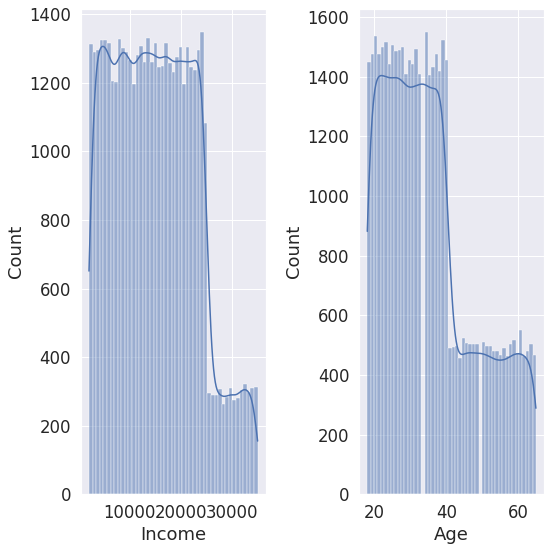

In [ ]:
## distributions
plt.figure(figsize=(8,8))
i = 1 
for col in ['Income','Age']:
  ax = plt.subplot(1,2,i)
  sns.histplot(data=df_plot_numer, x=col, kde=True)
  i+=1
plt.tight_layout()
plt.show()

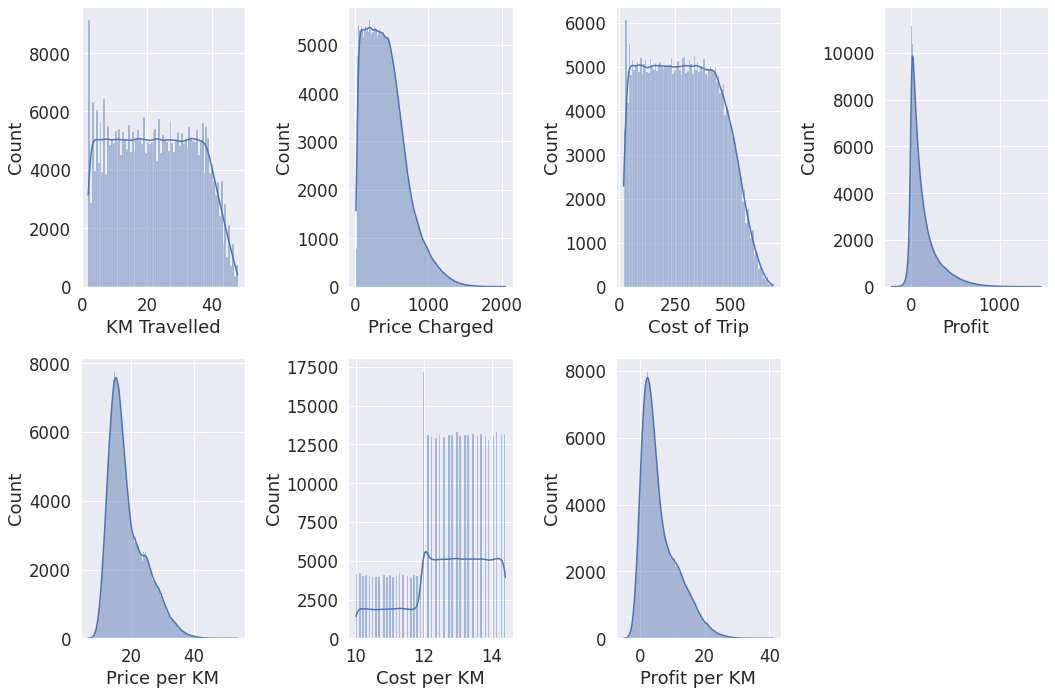

In [ ]:
## distributions
plt.figure(figsize=(15,10))
i = 1 
for col in ['KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit', 'Price per KM', 'Cost per KM', 'Profit per KM']:
  ax = plt.subplot(2,4,i)
  sns.histplot(data=df, x=col, kde=True)
  i+=1
plt.tight_layout()
plt.show()

**Takeaways**:

- **Most Customers are between the age of 18-40.**
- **Most Customers make less than 25000 USD/month**
- **The distribution of Price Charged is right skewed.**
- **Most Prices Charged values range between 0-500.**
- **The distribution of Cost of Trip is slightly right skewed.**
- **Most Cost of Trip values range between 0-400.**
- **The distribution of Profit is right skewed.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


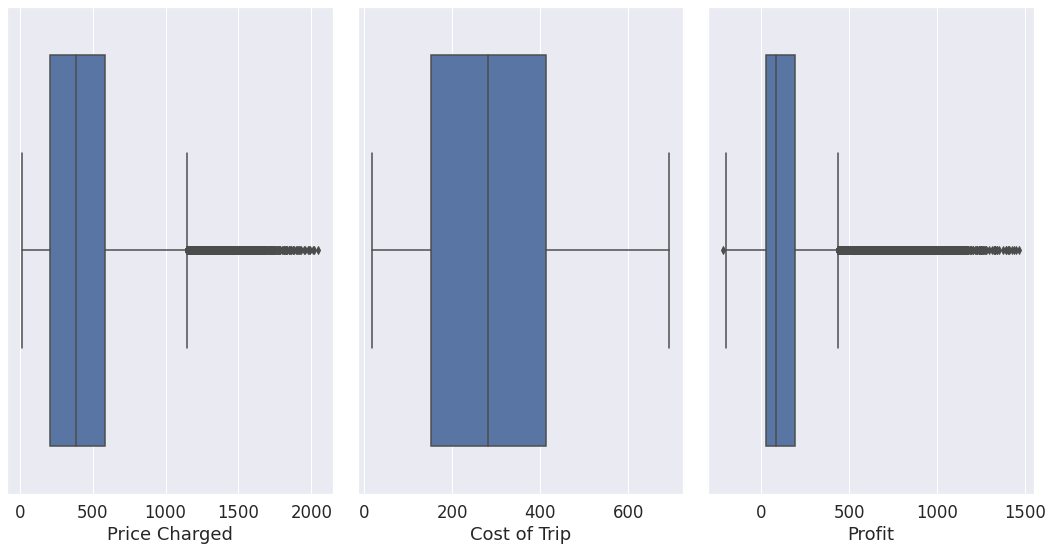

In [ ]:
## boxplots
cols = ['Price Charged', 'Cost of Trip','Profit']
plt.figure(figsize=(15,8))
i=1
for col in cols:
  ax = plt.subplot(1,3,i)
  sns.boxplot(df[col])
  i+=1
plt.tight_layout()
plt.show()

- **The mean Price Charged, Cost of trip, and Profit are around $400$,$290$, and $140$ dollars respectively.**

- **Based on the boxplots there are many outliers in the Price Charged and Profit.**

**Categorical Features.**

In [ ]:
for col in categorical_features:
  print(f'Column: {col}')
  print('----------------------')
  print(df[col].value_counts())
  print('-----------------------------------')
  print('-----------------------------------')

Column: Payment_Mode
----------------------
Card    215504
Cash    143888
Name: Payment_Mode, dtype: int64
-----------------------------------
-----------------------------------
Column: Gender
----------------------
Male      205912
Female    153480
Name: Gender, dtype: int64
-----------------------------------
-----------------------------------
Column: Company
----------------------
Yellow Cab    274681
Pink Cab       84711
Name: Company, dtype: int64
-----------------------------------
-----------------------------------
Column: City
----------------------
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
P

**Above we can see the count of each value of each categorical feature. However, we are again counting the same customer multiple times. For example, a customer in ATLANDA GA that made 3 transactions will result in counting ATLANDA GA 3 times. But, we don't have 3 different customers from ATLANDA GA. It is the same person. Let's deal with this as before.**

In [ ]:
df_gender = df[['Customer ID','Gender','City','Day','Payment_Mode','Company']]
df_gender.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
print(f'Total number of customers: {df_gender.shape[0]}')
num_males = df_gender[df_gender['Gender']=='Male'].shape[0]
num_females = df_gender[df_gender['Gender']=='Female'].shape[0]
print(f'Males: {num_males}')
print(f'Females: {num_females}')

Total number of customers: 46148
Males: 24675
Females: 21473


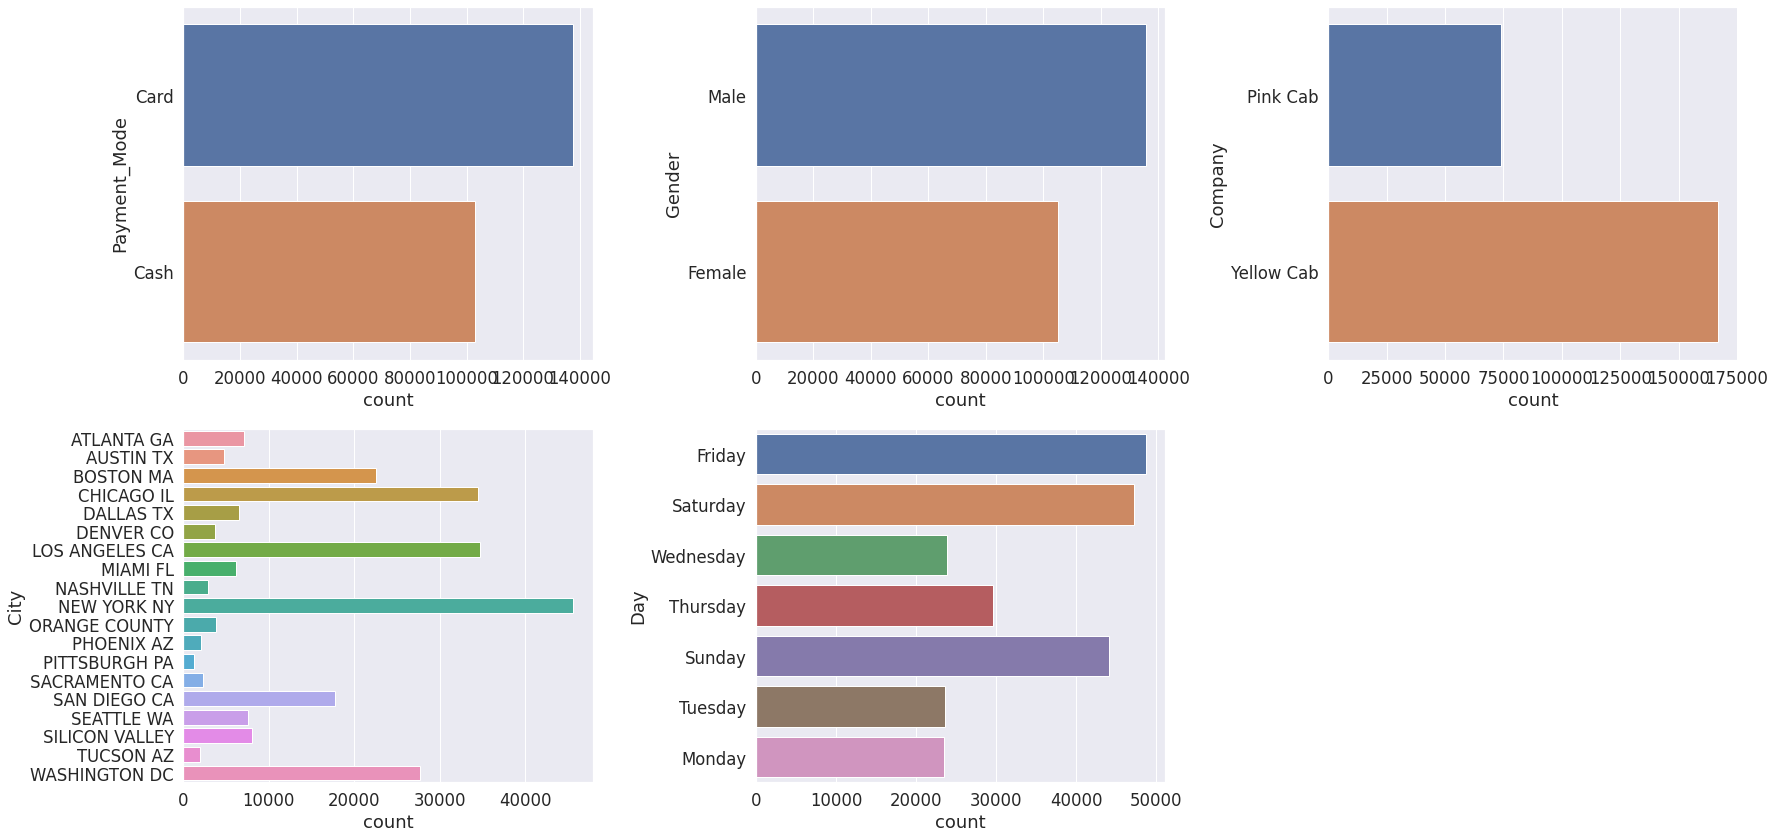

In [ ]:
## countplots of categorical features
#
plt.figure(figsize=(25,12))
i=1
for col in categorical_features:
	ax1 = plt.subplot(2,3,i)
	sns.countplot(y=col,data=df_gender)
	i += 1
plt.tight_layout()
plt.show()

**Takeaways**:

- **Most payments are made with Card.**
- **Most customers are Males.**
- **Yellow Cab makes way more trips than Pink Cab.**
- **Most customers leave in big cities. e.g. WASHINGTON DC,CHICAGO IL,NEW YORK NY,SAN DIEGO CA,LOS ANGELES CA,BOSTON MA**
- **Most trips are booked in Friday,Saturday, and Sunday.**

**Correlation analysis (bivariate analysis).**

**Transactions per Year for each company.**

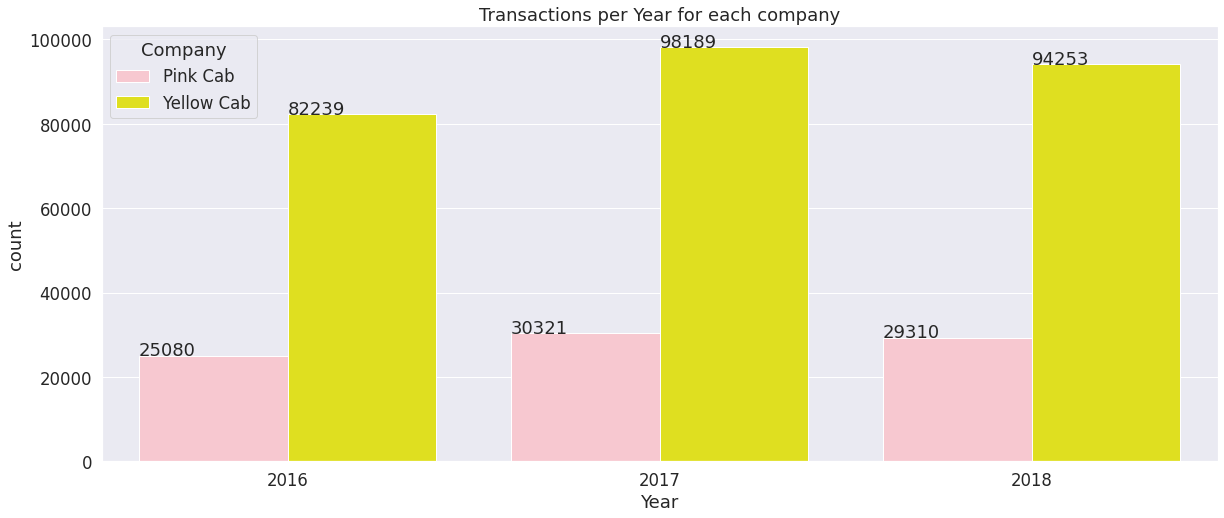

In [ ]:
plt.figure(figsize=(20,8))
g=sns.countplot(x='Year',data=df,hue='Company', palette=['pink','yellow'])
for p in g.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)
plt.title('Transactions per Year for each company')
plt.show()

- **Yellow Cab had way more transactions than Pink Cab in all three years.**
- **Both companies had the least and most transactions in 2016 and 2017 respectively.**

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


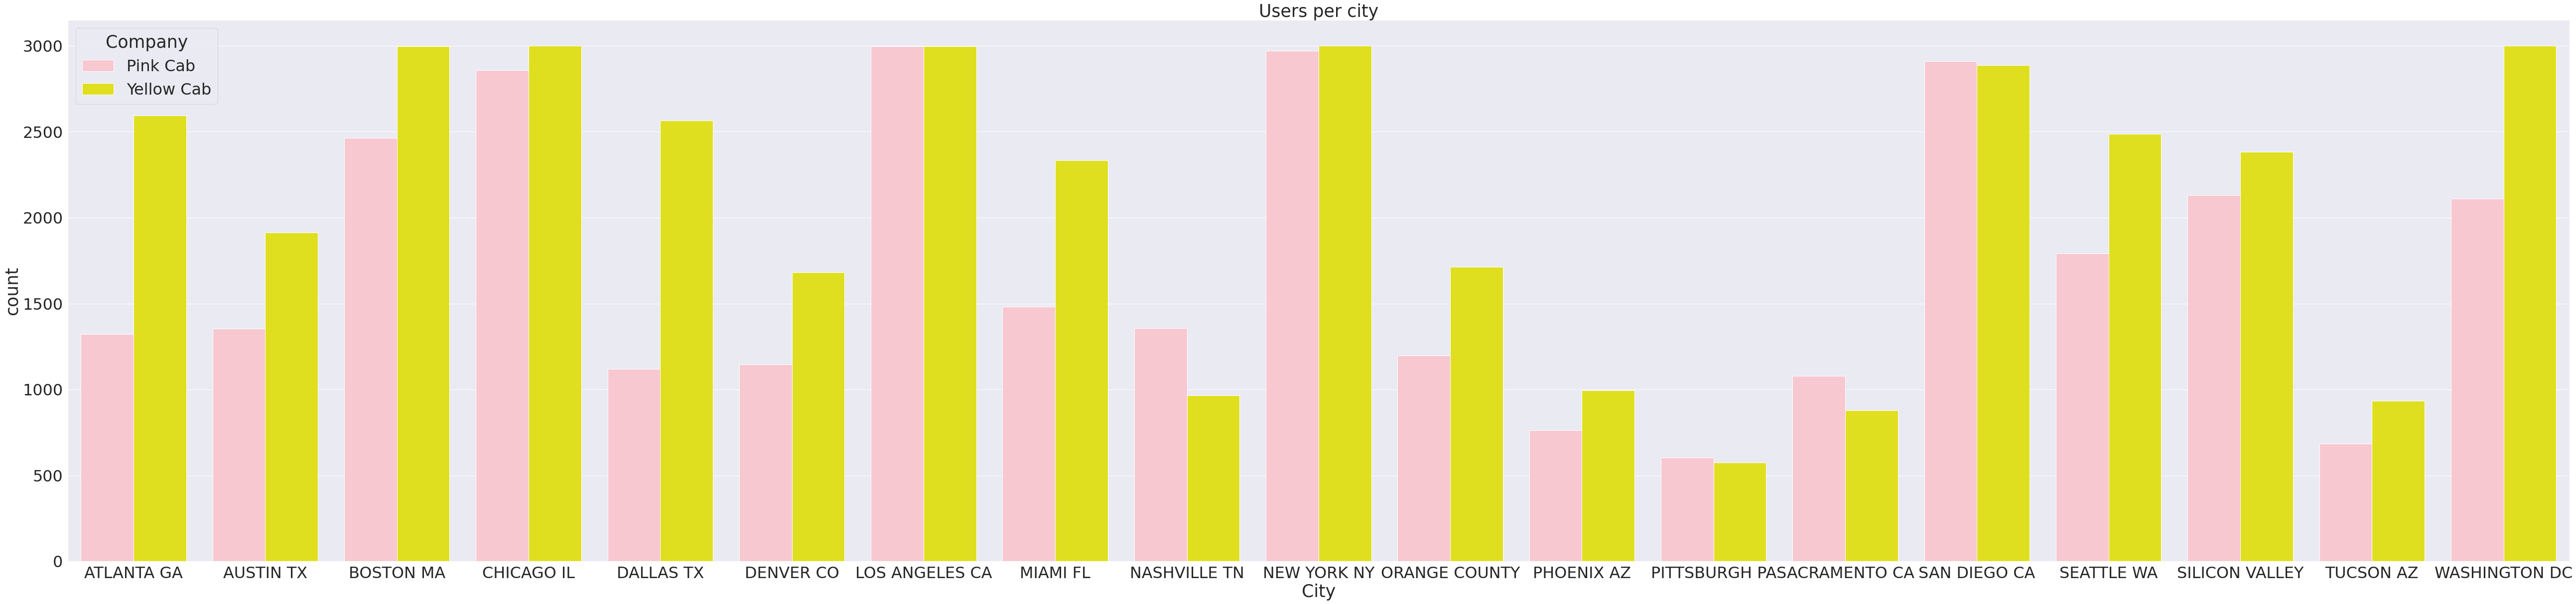

In [ ]:
df_gender_ = df[['Customer ID','Gender','City','Company']]
df_gender_.drop_duplicates(inplace=True)
plt.figure(figsize=(90,20))
sns.set(font_scale = 2.9)
g = sns.countplot(x='City',data=df_gender_,hue='Company', palette=['pink','yellow'])
plt.title('Users per city')
plt.show()

- **In most cities the number of users of the Yellow Cab company is more than that of the Pink Cab company.**

- **Only in NASHVILLE TN, SACRAMENTO CA, and SAN DIEGO CA the number of users of the Pink Cab company is more than that of the Yellow Cab company.**

- **The companies have almost the same number of users in LOS ANGELES CA and NEW YORK NY.**

In [ ]:
sns.set(font_scale = 1.5)

In [ ]:
df_profit = pd.DataFrame()
df_profit['Year'] = [2016, 2017, 2018, 2016, 2017, 2018]
df_profit['Company'] = ['Pink Cab', 'Pink Cab', 'Pink Cab', 'Yellow Cab', 'Yellow Cab', 'Yellow Cab']
df_profit['Profit'] = [df[(df['Year']==2016) & (df['Company']=='Pink Cab')]['Profit'].sum(),
                       df[(df['Year']==2017) & (df['Company']=='Pink Cab')]['Profit'].sum(),
                       df[(df['Year']==2018) & (df['Company']=='Pink Cab')]['Profit'].sum(),
                       df[(df['Year']==2016) & (df['Company']=='Yellow Cab')]['Profit'].sum(),
                       df[(df['Year']==2017) & (df['Company']=='Yellow Cab')]['Profit'].sum(),
                       df[(df['Year']==2018) & (df['Company']=='Yellow Cab')]['Profit'].sum()]

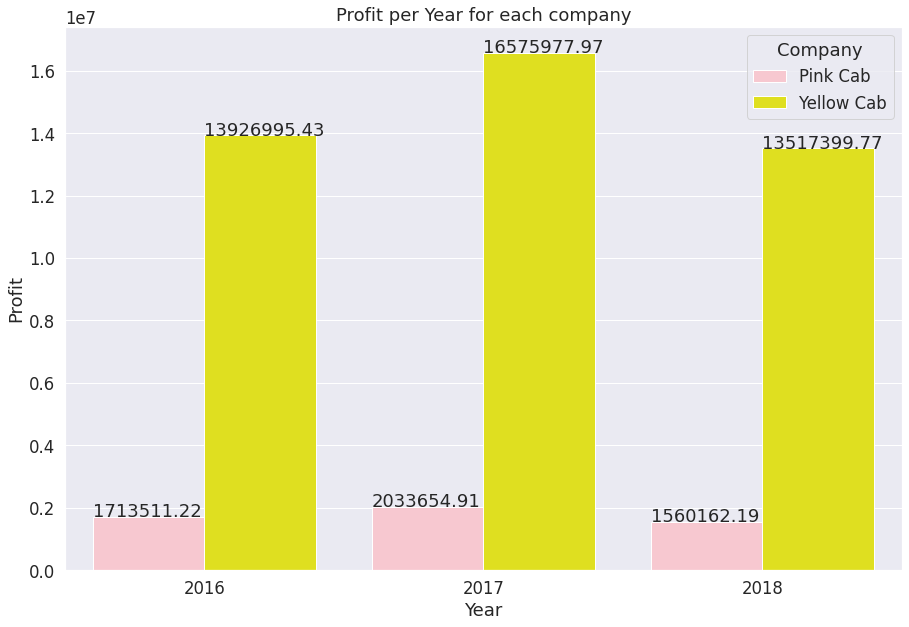

In [ ]:
plt.figure(figsize=(15,10))
g = sns.barplot(x='Year', y='Profit',data=df_profit, hue='Company', palette=['pink','yellow'], errwidth=0)
for p in g.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)
plt.title('Profit per Year for each company')
plt.show()

- **There is a huge difference in Profit between the two companies. Yellow Cab has a significantly larger Profit than Pink Cab.**
- **2017 was the most profitable year for both companies.**
- **2016 was more profitable than 2018 for both companies, despite having fewer transactions.**

In [ ]:
year_2016, year_2017, year_2018 = [2016] * 12, [2017] * 12, [2018] * 12
year = [*year_2016, *year_2017, *year_2018]
month = ['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sept','Oct','Nov','Dec'] * 3

monthly_profit_pink_2016 = []
monthly_profit_pink_2017 = []
monthly_profit_pink_2018 = []

monthly_profit_yellow_2016 = []
monthly_profit_yellow_2017 = []
monthly_profit_yellow_2018 = []

for i in range(1,13):
  monthly_profit_pink_2016.append(df[(df['Year']==2016) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Profit'].sum())
  monthly_profit_pink_2017.append(df[(df['Year']==2017) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Profit'].sum())
  monthly_profit_pink_2018.append(df[(df['Year']==2018) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Profit'].sum())
  monthly_profit_yellow_2016.append(df[(df['Year']==2016) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Profit'].sum())
  monthly_profit_yellow_2017.append(df[(df['Year']==2017) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Profit'].sum())
  monthly_profit_yellow_2018.append(df[(df['Year']==2018) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Profit'].sum())

monthly_profit_pink = [*monthly_profit_pink_2016,*monthly_profit_pink_2017, *monthly_profit_pink_2018]
monthly_profit_yellow = [*monthly_profit_yellow_2016,*monthly_profit_yellow_2017, *monthly_profit_yellow_2018]

df_monthly_profit_pink = pd.DataFrame({'Year':year, 'Month':month})
df_monthly_profit_yellow = pd.DataFrame({'Year':year, 'Month': month})

df_monthly_profit_pink['Profit'] = monthly_profit_pink
df_monthly_profit_yellow['Profit'] = monthly_profit_yellow

In [ ]:
monthly_trips_pink_2016 = []
monthly_trips_pink_2017 = []
monthly_trips_pink_2018 = []

monthly_trips_yellow_2016 = []
monthly_trips_yellow_2017 = []
monthly_trips_yellow_2018 = []

for i in range(1,13):
  monthly_trips_pink_2016.append(df[(df['Year']==2016) & (df['Company']=='Pink Cab') & (df['Month']==i)].shape[0])
  monthly_trips_pink_2017.append(df[(df['Year']==2017) & (df['Company']=='Pink Cab') & (df['Month']==i)].shape[0])
  monthly_trips_pink_2018.append(df[(df['Year']==2018) & (df['Company']=='Pink Cab') & (df['Month']==i)].shape[0])
  monthly_trips_yellow_2016.append(df[(df['Year']==2016) & (df['Company']=='Yellow Cab') & (df['Month']==i)].shape[0])
  monthly_trips_yellow_2017.append(df[(df['Year']==2017) & (df['Company']=='Yellow Cab') & (df['Month']==i)].shape[0])
  monthly_trips_yellow_2018.append(df[(df['Year']==2018) & (df['Company']=='Yellow Cab') & (df['Month']==i)].shape[0])

monthly_trips_pink = [*monthly_trips_pink_2016,*monthly_trips_pink_2017, *monthly_trips_pink_2018]
monthly_trips_yellow = [*monthly_trips_yellow_2016,*monthly_trips_yellow_2017, *monthly_trips_yellow_2018]

df_monthly_trips_pink = pd.DataFrame({'Year':year, 'Month':month})
df_monthly_trips_yellow = pd.DataFrame({'Year':year, 'Month':month})

df_monthly_trips_pink['Trips'] = monthly_trips_pink
df_monthly_trips_yellow['Trips'] = monthly_trips_yellow

In [ ]:
monthly_users_pink_2016 = []
monthly_users_pink_2017 = []
monthly_users_pink_2018 = []

monthly_users_yellow_2016 = []
monthly_users_yellow_2017 = []
monthly_users_yellow_2018 = []

for i in range(1,13):
  monthly_users_pink_2016.append(df[(df['Year']==2016) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Customer ID'].unique().shape[0])
  monthly_users_pink_2017.append(df[(df['Year']==2017) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Customer ID'].unique().shape[0])
  monthly_users_pink_2018.append(df[(df['Year']==2018) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Customer ID'].unique().shape[0])
  monthly_users_yellow_2016.append(df[(df['Year']==2016) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Customer ID'].unique().shape[0])
  monthly_users_yellow_2017.append(df[(df['Year']==2017) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Customer ID'].unique().shape[0])
  monthly_users_yellow_2018.append(df[(df['Year']==2018) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Customer ID'].unique().shape[0])

monthly_users_pink = [*monthly_users_pink_2016,*monthly_users_pink_2017, *monthly_users_pink_2018]
monthly_users_yellow = [*monthly_users_yellow_2016,*monthly_users_yellow_2017, *monthly_users_yellow_2018]

df_monthly_users_pink = pd.DataFrame({'Year':year, 'Month':month})
df_monthly_users_yellow = pd.DataFrame({'Year':year, 'Month':month})

df_monthly_users_pink['Users'] = monthly_users_pink
df_monthly_users_yellow['Users'] = monthly_users_yellow

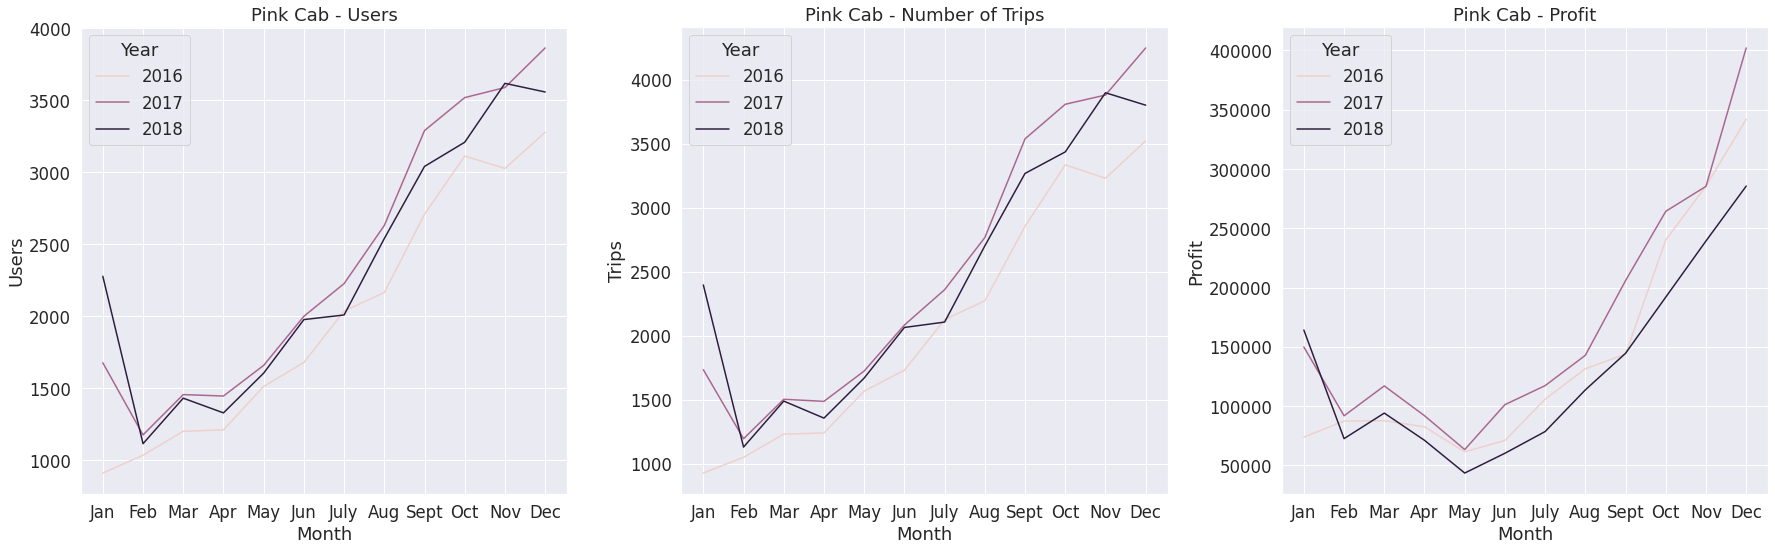

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

g__ = sns.lineplot(ax=axes[0], x='Month', y='Users',data=df_monthly_users_pink, hue='Year')
axes[0].set_title('Pink Cab - Users') 

g = sns.lineplot(ax=axes[1], x='Month', y='Trips',data=df_monthly_trips_pink, hue='Year')
axes[1].set_title('Pink Cab - Number of Trips')

g_ = sns.lineplot(ax=axes[2], x='Month', y='Profit',data=df_monthly_profit_pink, hue='Year')
axes[2].set_title('Pink Cab - Profit')

plt.tight_layout()
plt.show()

**Profit vs Month vs Year for the Pink Cab company**:

- **All three years follow the same trend.**
- **In Feb there was a drop in Profit, in Mar there was an increase in Profit, a big drop during Apr-May, and then the Profit gradually increased until the end of the year.**

**Number of Trips and users vs Year vs Month for the Pink Cab company:**

- **There was a big drop in number of trips and users in Feb for the years 2017-2018.**
- **There is a gradually increase in numbers of trips and users in all three years.**

**Overall**:

- **Profit and Number of trips seem to be highly positively correlated.** 
- **Despite the increase in number of trips in Mar-May, the profit decreased significantly.**

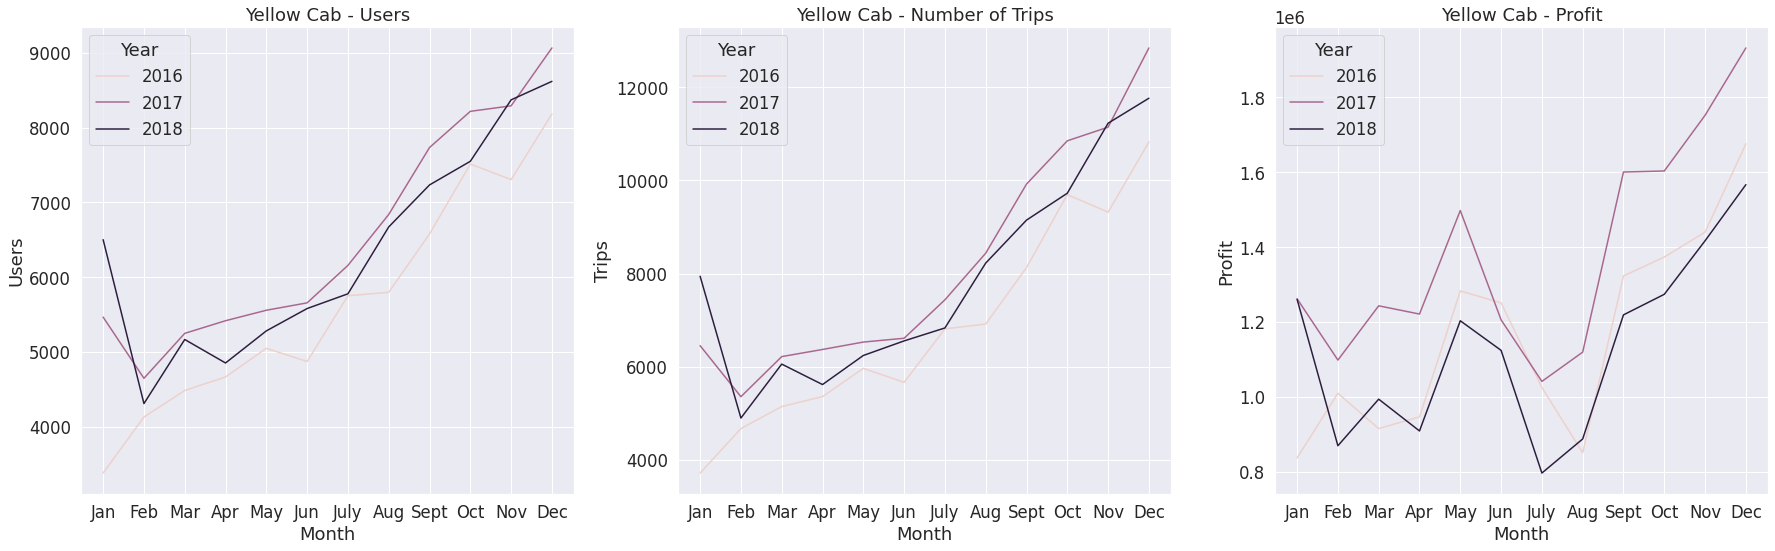

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(25, 8))

g__ = sns.lineplot(ax=axes[0], x='Month', y='Users',data=df_monthly_users_yellow, hue='Year')
axes[0].set_title('Yellow Cab - Users') 

g = sns.lineplot(ax=axes[1], x='Month', y='Trips',data=df_monthly_trips_yellow, hue='Year')
axes[1].set_title('Yellow Cab - Number of Trips')

g_ = sns.lineplot(ax=axes[2], x='Month', y='Profit',data=df_monthly_profit_yellow, hue='Year')
axes[2].set_title('Yellow Cab - Profit')

plt.tight_layout()
plt.show()

**Profit vs Month vs Year for the Yellow Cab company**:

- **2017 and 2018 follow the same trend. A bid drop in Profit in Feb,Jun,and July and a big increase in Profit in May,and Sept onwards.**

- **In 2016 there was an increase in Profit in Feb,May, and Sept onwards. There was a huge drop in Profit in Aug.**

**Number of Trips and USers vs Year vs Month for the Yellow Cab company:**

- **There was a big drop in number of trips and users in Feb for the years 2017-2018.**
- **There is a gradually increase in numbers of trips and users in all three years.**

**Overall**:

- **Profit and Number of trips seem to be positively correlated.** 
- **Despite the steady increase in number or trips during the summer months, the profit decreased dramatically.** 

**Yellow Cab vs Pink Cab:**

- **Yellow Cab has twice as many users as Pink Cab.**
- **Yellow Cab has about three times more number of trips than Pink Cab.**

In [ ]:
monthly_price_charged_pink_2016 = []
monthly_price_charged_pink_2017 = []
monthly_price_charged_pink_2018 = []

monthly_price_charged_yellow_2016 = []
monthly_price_charged_yellow_2017 = []
monthly_price_charged_yellow_2018 = []

for i in range(1,13):
  monthly_price_charged_pink_2016.append(df[(df['Year']==2016) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Price Charged'].mean())
  monthly_price_charged_pink_2017.append(df[(df['Year']==2017) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Price Charged'].mean())
  monthly_price_charged_pink_2018.append(df[(df['Year']==2018) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Price Charged'].mean())
  monthly_price_charged_yellow_2016.append(df[(df['Year']==2016) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Price Charged'].mean())
  monthly_price_charged_yellow_2017.append(df[(df['Year']==2017) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Price Charged'].mean())
  monthly_price_charged_yellow_2018.append(df[(df['Year']==2018) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Price Charged'].mean())

monthly_price_charged_pink = [*monthly_price_charged_pink_2016,*monthly_price_charged_pink_2017, *monthly_price_charged_pink_2018]
monthly_price_charged_yellow = [*monthly_price_charged_yellow_2016,*monthly_price_charged_yellow_2017, *monthly_price_charged_yellow_2018]

df_monthly_price_charged_pink = pd.DataFrame({'Year':year, 'Month':month})
df_monthly_price_charged_yellow = pd.DataFrame({'Year':year, 'Month':month})

df_monthly_price_charged_pink['Price Charged'] = monthly_price_charged_pink
df_monthly_price_charged_yellow['Price Charged'] = monthly_price_charged_yellow

In [ ]:
monthly_cost_of_trip_pink_2016 = []
monthly_cost_of_trip_pink_2017 = []
monthly_cost_of_trip_pink_2018 = []

monthly_cost_of_trip_yellow_2016 = []
monthly_cost_of_trip_yellow_2017 = []
monthly_cost_of_trip_yellow_2018 = []

for i in range(1,13):
  monthly_cost_of_trip_pink_2016.append(df[(df['Year']==2016) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Cost of Trip'].mean())
  monthly_cost_of_trip_pink_2017.append(df[(df['Year']==2017) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Cost of Trip'].mean())
  monthly_cost_of_trip_pink_2018.append(df[(df['Year']==2018) & (df['Company']=='Pink Cab') & (df['Month']==i)]['Cost of Trip'].mean())
  monthly_cost_of_trip_yellow_2016.append(df[(df['Year']==2016) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Cost of Trip'].mean())
  monthly_cost_of_trip_yellow_2017.append(df[(df['Year']==2017) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Cost of Trip'].mean())
  monthly_cost_of_trip_yellow_2018.append(df[(df['Year']==2018) & (df['Company']=='Yellow Cab') & (df['Month']==i)]['Cost of Trip'].mean())

monthly_cost_of_trip_pink = [*monthly_cost_of_trip_pink_2016,*monthly_cost_of_trip_pink_2017, *monthly_cost_of_trip_pink_2018]
monthly_cost_of_trip_yellow = [*monthly_cost_of_trip_yellow_2016,*monthly_cost_of_trip_yellow_2017, *monthly_cost_of_trip_yellow_2018]

df_monthly_cost_of_trip_pink = pd.DataFrame({'Year':year, 'Month':month})
df_monthly_cost_of_trip_yellow = pd.DataFrame({'Year':year, 'Month':month})

df_monthly_cost_of_trip_pink['Cost of Trip'] = monthly_cost_of_trip_pink
df_monthly_cost_of_trip_yellow['Cost of Trip'] = monthly_cost_of_trip_yellow

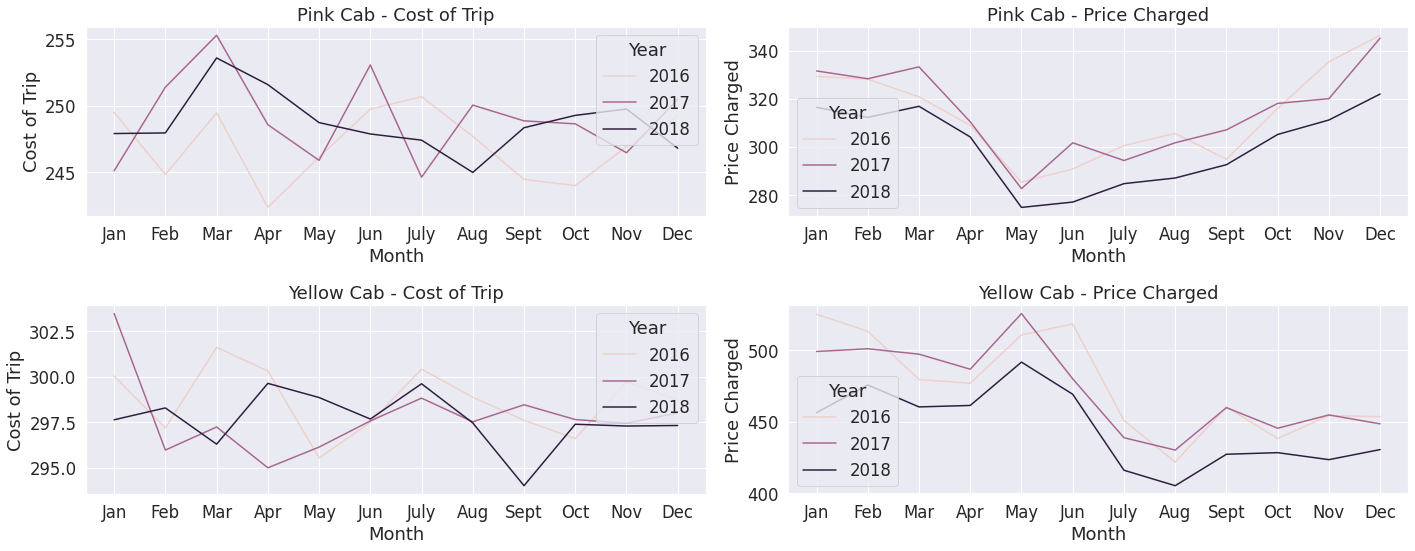

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 8))
g = sns.lineplot(ax=axes[0,0], x='Month', y='Cost of Trip',data=df_monthly_cost_of_trip_pink, hue='Year')
axes[0,0].set_title('Pink Cab - Cost of Trip')
g_ = sns.lineplot(ax=axes[0,1], x='Month', y='Price Charged',data=df_monthly_price_charged_pink, hue='Year')
axes[0,1].set_title('Pink Cab - Price Charged')

g__ = sns.lineplot(ax=axes[1,0], x='Month', y='Cost of Trip',data=df_monthly_cost_of_trip_yellow, hue='Year')
axes[1,0].set_title('Yellow Cab - Cost of Trip')
g____ = sns.lineplot(ax=axes[1,1], x='Month', y='Price Charged',data=df_monthly_price_charged_yellow, hue='Year')
axes[1,1].set_title('Yellow Cab - Price Charged')

plt.tight_layout()
plt.show()

- **It is clear now that during the months Mar-May the Cost of Trip decreased slightly, whereas the Price Charged dropped significantly. This caused the big drop in profit during these months for the Pink Cab Company.**

- **During the summer months the Cost of Trip slightly increased, whereas the Price Charged decreased dramatically. This caused the big drop in profit for the Yellow Cab company.**

- **There is a distinct difference in Price Charged in May. Yellow Cab increased their prices, whereas Pink Cab dropped them significantly. NB: The prices of Yellow Cab are much higher than Pink's Cab year round.**

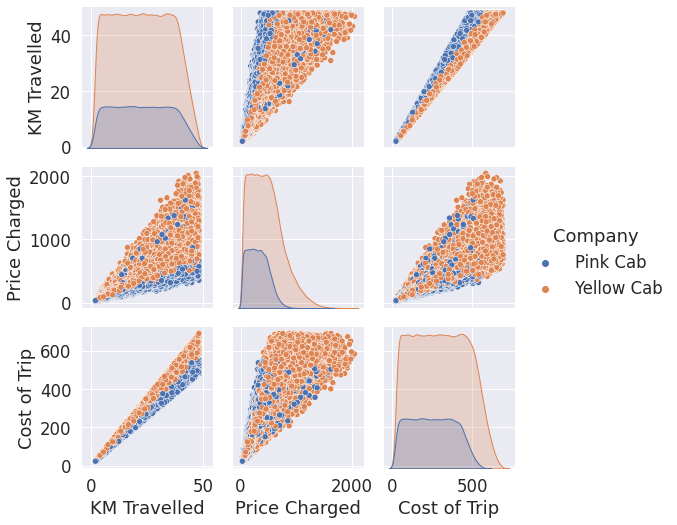

In [ ]:
pairplot_df = df[['KM Travelled', 'Price Charged', 'Cost of Trip','Company']]
sns.pairplot(data=pairplot_df,hue='Company')

- **Both the Cost of Trip and Price Charged are positively correlated with the KM Travelled.**

- **The cost of trip of the Yellow Cab company is slightly bigger than that of the Pink Cab company. However, there is a big difference in the Price Charged. The Yellow Cab company charges way more than the Pink Cab company. Hence, the huge difference in profits.**

**USERS PER CITY**

In [ ]:
df_users_per_city = df.groupby(by=['City'])['Customer ID'].nunique()
df_users_per_city_pink = df[df['Company']=='Pink Cab'].groupby(by=['City'])['Customer ID'].nunique()
df_users_per_city_yellow = df[df['Company']=='Yellow Cab'].groupby(by=['City'])['Customer ID'].nunique()

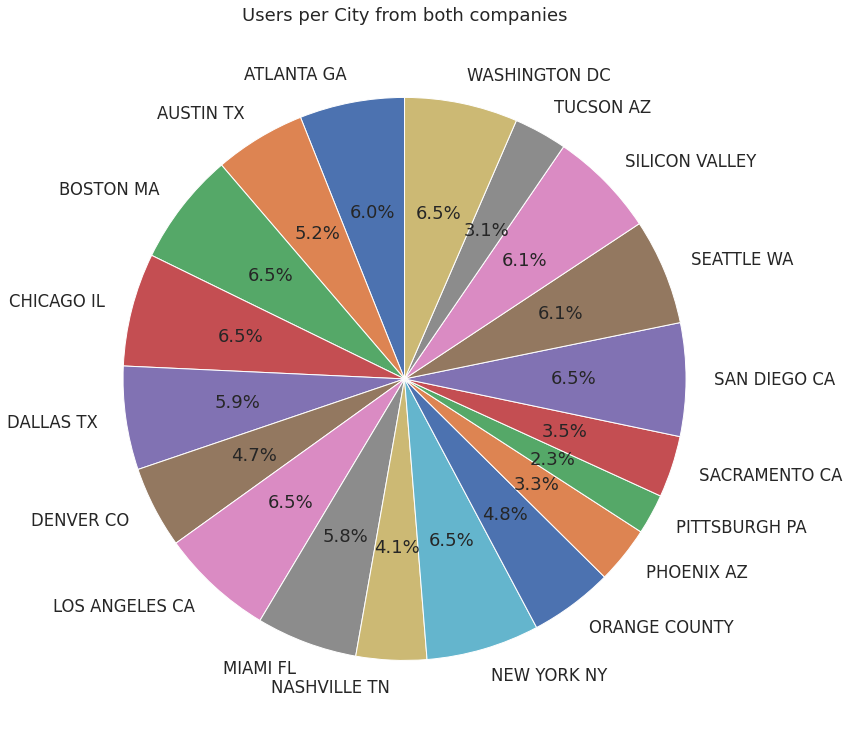

In [ ]:
labels = df['City'].unique()
plt.figure(figsize=(12,12))
plt.pie(df_users_per_city, labels = labels, startangle = 90,autopct='%1.1f%%')
plt.title('Users per City from both companies')
plt.tight_layout()
plt.show() 

- **The number of users in big cities (e.g. NEW YORK NY, LOS ANGELES CA) is bigger than in other smaller cities, which makes sense since their population is larger.**

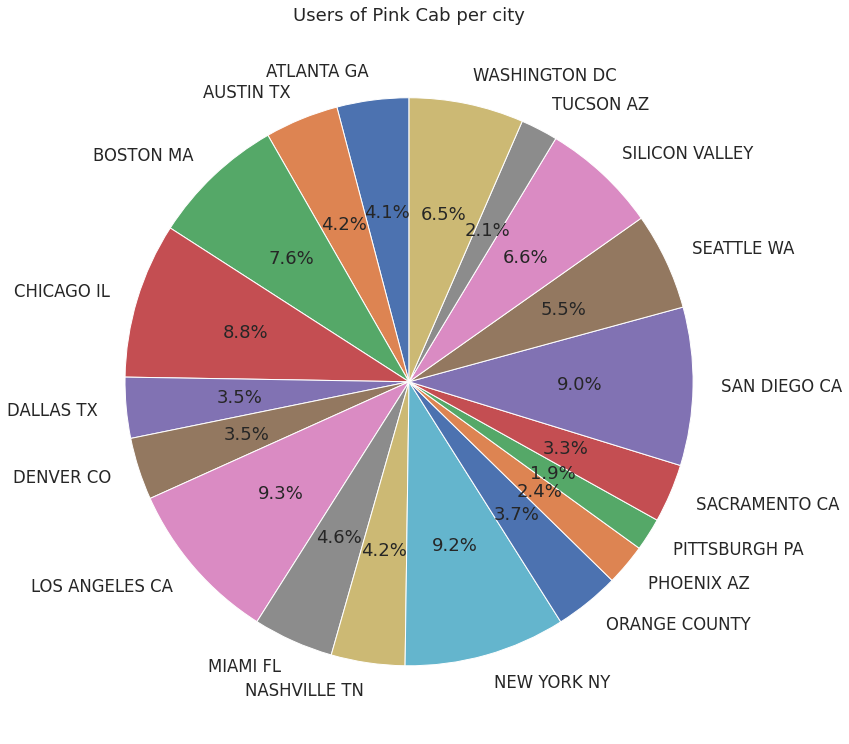

In [ ]:
labels = df[df['Company']=='Pink Cab']['City'].unique()
plt.figure(figsize=(12,12))
plt.pie(df_users_per_city_pink, labels = labels, startangle = 90,autopct='%1.1f%%')
plt.title('Users of Pink Cab per city')
plt.tight_layout()
plt.show() 

- **Most users of the Pink Cab company are from LOS ANGELES CA,NEW YORK NY, and SAN DIEGO CA.**

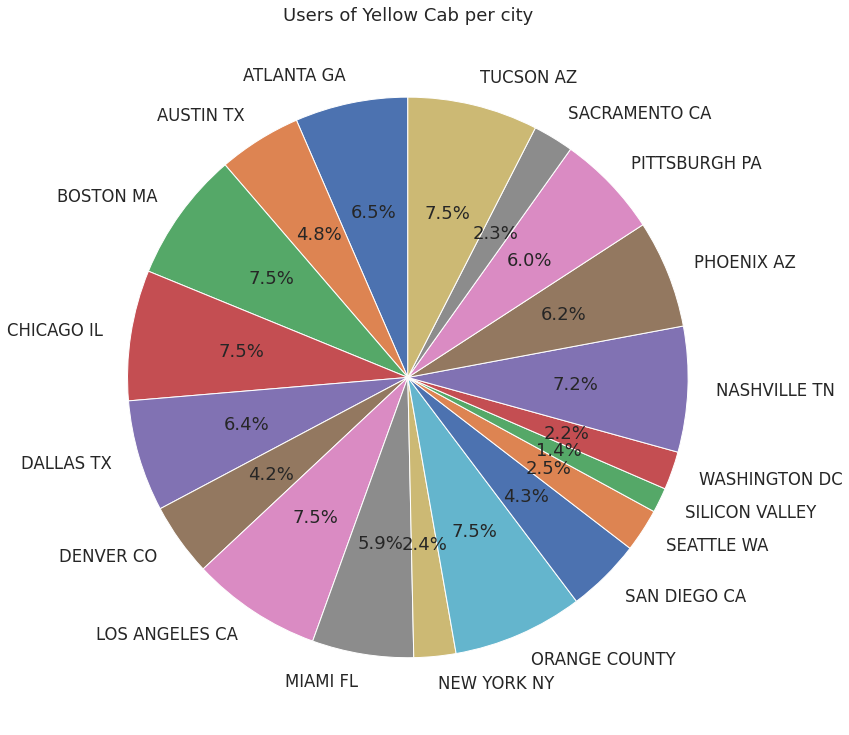

In [ ]:
labels = df[df['Company']=='Yellow Cab']['City'].unique()
plt.figure(figsize=(12,12))
plt.pie(df_users_per_city_yellow, labels = labels, startangle = 90,autopct='%1.1f%%')
plt.title('Users of Yellow Cab per city')
plt.tight_layout()
plt.show() 

- **Most users of the Yellow Cab company are from LOS ANGELES CA,NEW YORK NY, CHICAGO IL, BOSTON MA, and TUCSON AZ.**

- **The Yellow Cab company has many customers in more cities than the Pink Cab company.**

**PROFIT PER CITY**

In [ ]:
df_profit_per_city = df.groupby(by=['City'])['Profit'].sum()
df_profit_per_city_pink = df[df['Company']=='Pink Cab'].groupby(by=['City'])['Profit'].sum()
df_profit_per_city_yellow = df[df['Company']=='Yellow Cab'].groupby(by=['City'])['Profit'].sum()

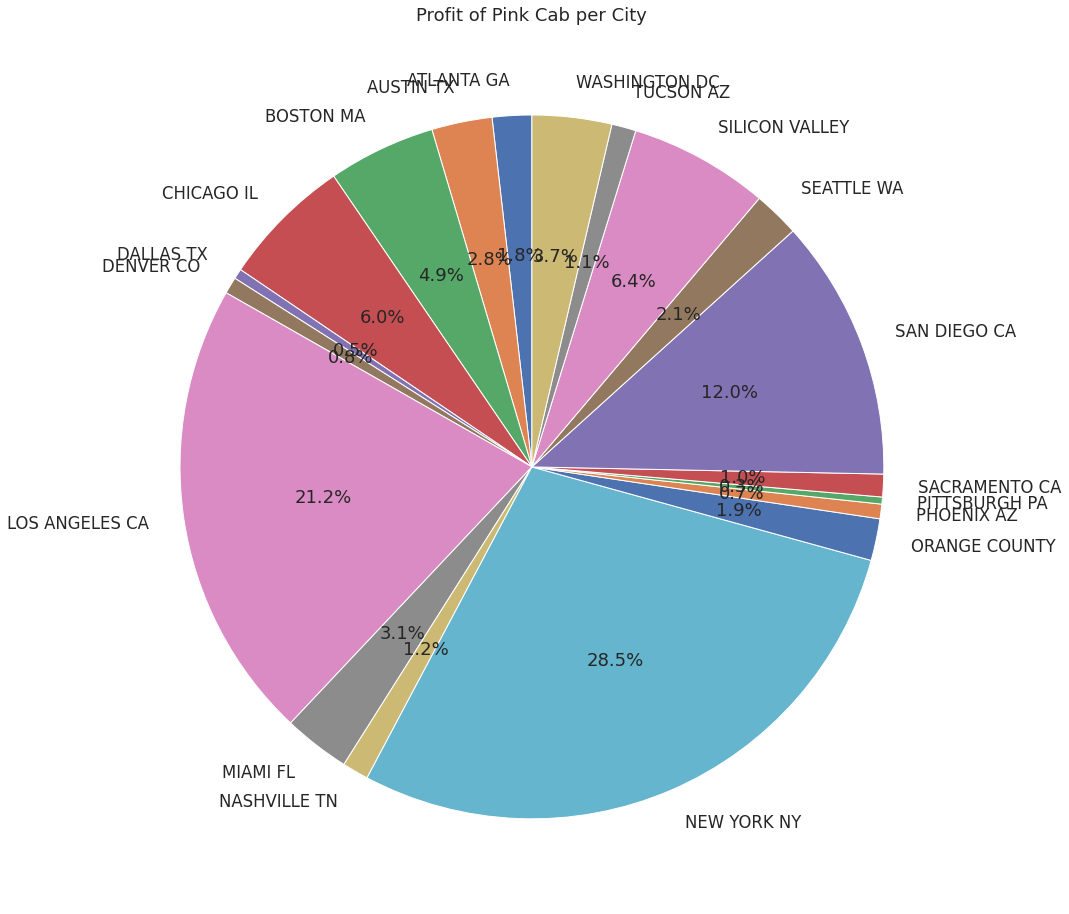

In [ ]:
labels = df['City'].unique()
plt.figure(figsize=(15,15))
plt.pie(df_profit_per_city_pink, labels = labels, startangle = 90,autopct='%1.1f%%')
plt.title('Profit of Pink Cab per City')
plt.tight_layout()
plt.show() 

- **The Pink Cab company makes the most profit in NEW YORK NY, LOS ANGELES CA, and SAN DIEGO CA.**


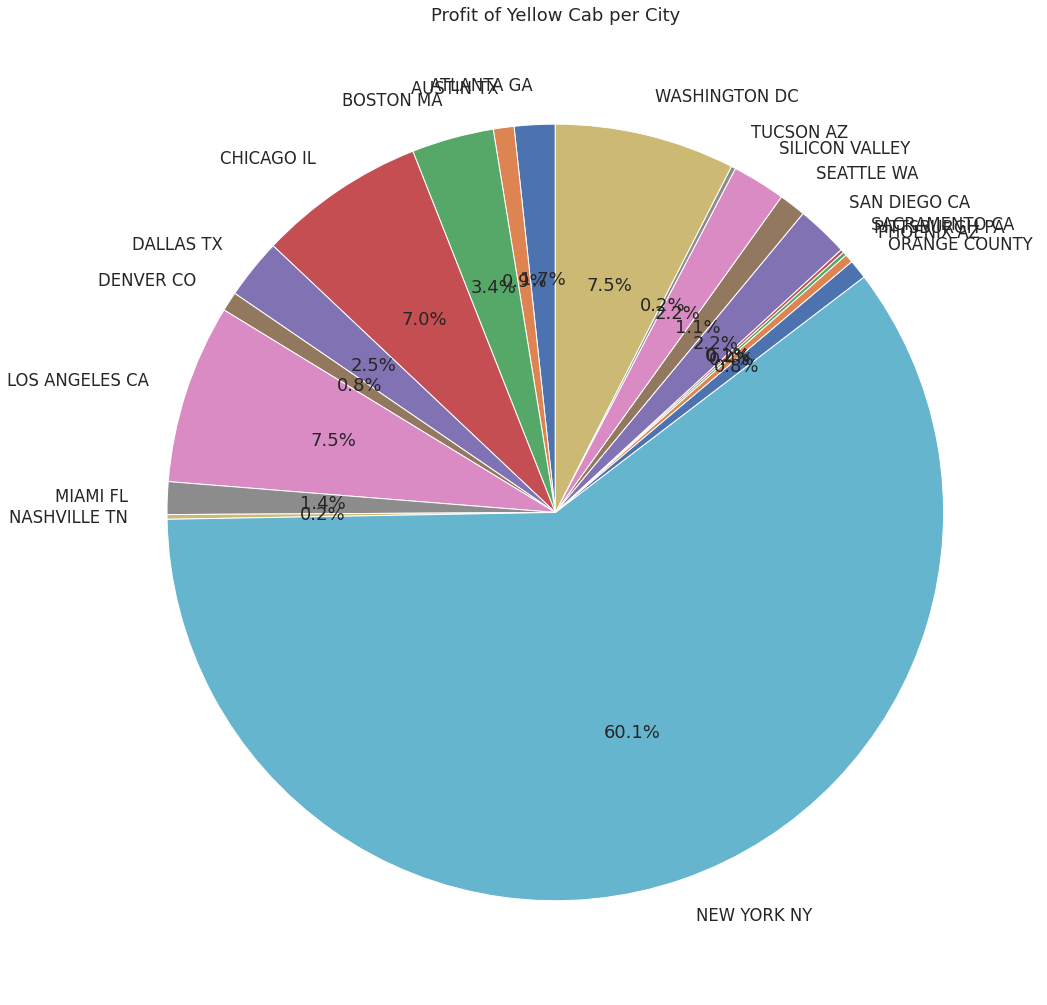

In [ ]:
labels = df['City'].unique()
plt.figure(figsize=(15,15))
plt.pie(df_profit_per_city_yellow, labels = labels, startangle = 90,autopct='%1.1f%%')
plt.title('Profit of Yellow Cab per City')
plt.tight_layout()
plt.show() 

- **The Yellow Cab company makes $60$% of its profit in NEW YORK NY!**

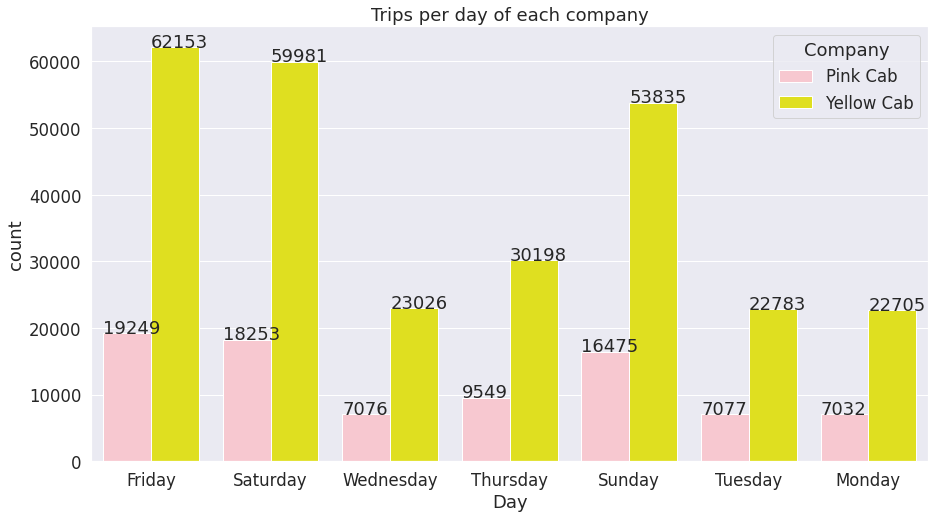

In [ ]:
plt.figure(figsize=(15,8))
g = sns.countplot(x='Day',data=df, hue='Company', palette=['Pink','Yellow'])
for p in g.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)
plt.title('Trips per day of each company')
plt.show()

- **Both companies have more trips during the weekend and on Friday.**

In [ ]:
bins_pink = [0,1,5,10,20]
bins_yellow = [0,1, 5, 10, 20, 30, 40, 50]
df_binned_pink = pd.DataFrame()
df_binned_yellow = pd.DataFrame()
df_binned_pink['pink_binned'] = pd.cut(df[df['Company']=='Pink Cab']['Customer ID'].value_counts(), bins_pink)
df_binned_yellow['yellow_binned'] = pd.cut(df[df['Company']=='Yellow Cab']['Customer ID'].value_counts(), bins_yellow)

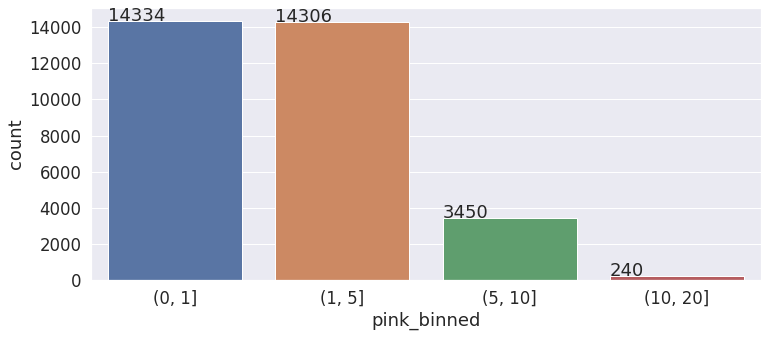

In [ ]:
plt.figure(figsize=(12,5))
g = sns.countplot(x='pink_binned',data=df_binned_pink)
for p in g.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)
plt.show()

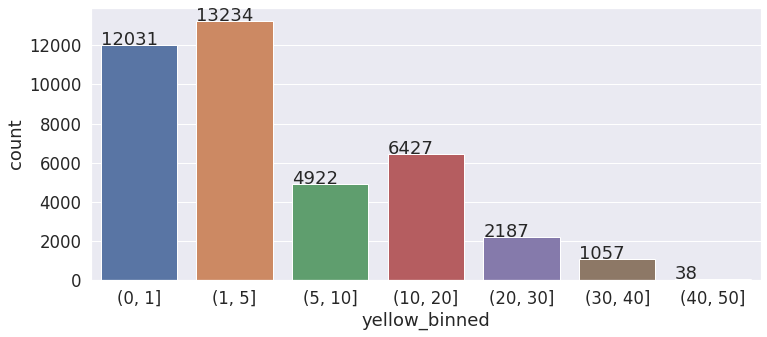

In [ ]:
plt.figure(figsize=(12,5))
g = sns.countplot(x='yellow_binned',data=df_binned_yellow)
for p in g.patches:
    txt = str(p.get_height().round(2))
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.text(txt_x,txt_y,txt)
plt.show()

- **Most customers use the Pink Cab company once or up to $5$ times.**
- **Most customers use th Yellow Cab company more than one time. About one third of its customers use its services more than $5$ times.**
- **The Yellow Cab company does a better job at retaining its customers than the Pink Cab company.**

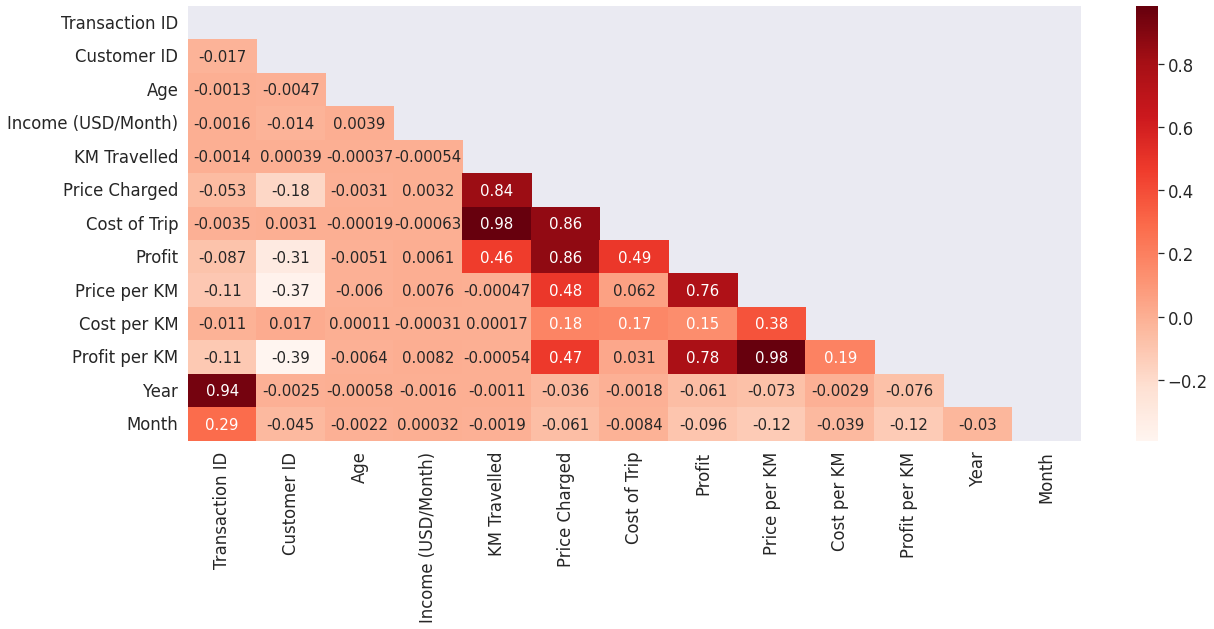

In [ ]:
## Correlation Heatmap

#sns.set(font_scale=1.4)
# correlation 
cor = df.corr('pearson')
matrix = np.triu(cor)

# heatmap to visualise the correlation
plt.figure(figsize=(20,8))
sns.heatmap(cor,annot=True, cmap=plt.cm.Reds, mask=matrix,annot_kws={'size': 15})
plt.show()

**Highly positively correlated features**:

- **Cost of Trip - KM Travelled**  
- **Price Charged - KM Travelled** 
- **Cost of Trip - Price Charged** 
- **Profit - Price Charged**

**Hypothesis Testing.**

In [ ]:
## Helper functions to check for normality and variance homogeneity
## Ref: https://github.com/eceisik/eip/blob/main/hypothesis_testing_examples.ipynb
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis --> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis --> The data is normally distributed")   

def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis --> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis --> The variances of the samples are same.")

def mannwhitneyu_test(a,b):
    ttest, pvalue = stats.mannwhitneyu(a,b, alternative="two-sided")
    print("p-value:%.4f" % pvalue)
    if pvalue <0.05:
        return "Reject null hypothesis"
    else:
        return "Fail to reject null hypothesis"

## Welch's t-test
def ttest_ind(a,b):
    ttest,p_value = stats.ttest_ind(a,b,equal_var=False)
    print("p value:%.4f" % p_value)
    print("since the hypothesis is one sided --> use p_value/2 --> p_value_one_sided:%.4f" %(p_value/2))
    if p_value/2 <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis") 


def kruskal_test(a,b,c):
    F, p_value = stats.kruskal(a,b,c)
    print("p value:%.6f" % p_value)
    if p_value <0.05:
        print("Reject null hypothesis")
    else:
        print("Fail to reject null hypothesis")

**1. Payment Mode: Cash vs Card**

**Defining hypothesis:**

- **$H_{0}: \mu_{cash} \leq \mu_{card}$**

- **$H_{1}: \mu_{cash} > \mu_{card}$**

In [ ]:
print('Pink Cab:')
print('-------------')
cash_pink = df[(df['Payment_Mode']=='Cash')&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
card_pink = df[(df['Payment_Mode']=='Card')&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(cash_pink.values)
check_normality(card_pink.values)
check_variance_homogeneity(cash_pink.values, card_pink.values)
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
cash_yellow = df[(df['Payment_Mode']=='Cash')&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
card_yellow = df[(df['Payment_Mode']=='Card')&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(cash_yellow.values)
check_normality(card_yellow.values)
check_variance_homogeneity(cash_yellow.values, card_yellow.values)

Pink Cab:
-------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.3825
Fail to reject null hypothesis --> The variances of the samples are same.
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0838
Fail to reject null hypothesis --> The variances of the samples are same.


- **There are two groups (cash and card), and data is collected from different individuals (we take the mean), so it is not paired. However, the normality assumption is not satisfied. Therefore, we need to use the non-parametric version of 2 group comparison for unpaired data: the Mann-Whitney U Test.**

In [ ]:
print('Pink Cab:')
print('-------------')
print(mannwhitneyu_test(cash_pink.values, card_pink.values))
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
print(mannwhitneyu_test(cash_yellow.values, card_yellow.values))

Pink Cab:
-------------
p-value:0.8917
Fail to reject null hypothesis
-------------------------------------------------------------------------
Yellow Cab:
---------------
p-value:0.9352
Fail to reject null hypothesis


- **At this significance level, it can be said that there is no statistically significant difference between the two payment methods.**


**2. Gender: Male vs Female**

**Defining hypothesis:**

- **$H_{0}: \mu_{male} \leq \mu_{female}$**

- **$H_{1}: \mu_{male} > \mu_{female}$**

In [ ]:
print('Pink Cab:')
print('-------------')
male_pink = df[(df['Gender']=='Male')&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
female_pink = df[(df['Gender']=='Female')&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(male_pink.values)
check_normality(female_pink.values)
check_variance_homogeneity(male_pink.values, female_pink.values)
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
male_yellow = df[(df['Gender']=='Male')&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
female_yellow = df[(df['Gender']=='Female')&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(male_yellow.values)
check_normality(female_yellow.values)
check_variance_homogeneity(male_yellow.values, female_yellow.values)

Pink Cab:
-------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.4141
Fail to reject null hypothesis --> The variances of the samples are same.
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The variances of the samples are different.


**Pink Cab:**

- **There are two groups (male and female), and data is collected from different individuals (we take the mean), so it is not paired. However, the normality assumption is not satisfied. Therefore, we need to use the non-parametric version of 2 group comparison for unpaired data: the Mann-Whitney U Test.**

- **Yellow Cab:**

- **There are two groups (male and female), and data is collected from different individuals (we take the mean), so it is not paired. However, both the normality assumption and equal variance assumption are not satisfied. Therefore, we need to use the non-parametric version of 2 group comparison for unpaired data: the Welch's t Test. We can use it here since the number of samples is >50.**

In [ ]:
print('Pink Cab:')
print('-------------')
print(mannwhitneyu_test(male_pink.values, female_pink.values))
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
print(ttest_ind(male_yellow.values, female_yellow.values))

Pink Cab:
-------------
p-value:0.1298
Fail to reject null hypothesis
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.0000
since the hypothesis is one sided --> use p_value/2 --> p_value_one_sided:0.0000
Reject null hypothesis
None


**Pink Cab:**

- **At this significance level, it can be said that there is no statistically significant difference between the two genders.**

**Yellow Cab:**

- **At this significance level, it can be said that there is statistically significant difference between the two genders.**

- **We validate that Males bring in more Profit than Females.**

**3. Age: Older than 40 vs Younger than 40**

**Defining hypothesis:**

- **$H_{0}: \mu_{\ge60} \leq \mu_{<60}$**

- **$H_{1}: \mu_{\ge60} > \mu_{<60}$**

In [ ]:
print('Pink Cab:')
print('-------------')
ot60_pink = df[(df['Age'] >= 60)&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
yt60_pink = df[(df['Age'] < 60)&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(ot60_pink.values)
check_normality(yt60_pink.values)
check_variance_homogeneity(ot60_pink.values, yt60_pink.values)
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
ot60_yellow = df[(df['Age']>=60)&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
yt60_yellow = df[(df['Age']<60)&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(ot60_yellow.values)
check_normality(yt60_yellow.values)
check_variance_homogeneity(ot60_yellow.values, yt60_yellow.values)

Pink Cab:
-------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.4281
Fail to reject null hypothesis --> The variances of the samples are same.
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0034
Reject null hypothesis --> The variances of the samples are different.


**Pink Cab:**

- **There are two groups, and data is collected from different individuals (we take the mean), so it is not paired. However, the normality assumption is not satisfied. Therefore, we need to use the non-parametric version of 2 group comparison for unpaired data: the Mann-Whitney U Test.**

- **Yellow Cab:**

- **There are two groups, and data is collected from different individuals (we take the mean), so it is not paired. However, both the normality assumption and equal variance assumption are not satisfied. Therefore, we need to use the non-parametric version of 2 group comparison for unpaired data: the Welch's t Test. We can use it here since the number of samples is >50.**

In [ ]:
print('Pink Cab:')
print('-------------')
print(mannwhitneyu_test(ot60_pink.values, yt60_pink.values))
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
print(ttest_ind(ot60_yellow.values, yt60_yellow.values))

Pink Cab:
-------------
p-value:0.7021
Fail to reject null hypothesis
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.0001
since the hypothesis is one sided --> use p_value/2 --> p_value_one_sided:0.0000
Reject null hypothesis
None


**Pink Cab:**

- **At this significance level, it can be said that there is no statistically significant difference between older and younger than 60yo.**

**Yellow Cab:**

- **At this significance level, it can be said that there is statistically significant difference between older and younger than 60yo.**

- **We validate that customers older than 60yo bring in more Profit than customers younger than 60yo.**

In [ ]:
print('Pink Cab:')
print('-------------')
pink_2016 = df[(df['Year'] == 2016)&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
pink_2017 = df[(df['Year'] == 2017)&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
pink_2018 = df[(df['Year'] == 2018)&(df['Company']=='Pink Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(pink_2016.values)
check_normality(pink_2017.values)
check_normality(pink_2018.values)

stat, pvalue_levene= stats.levene(pink_2016.values,pink_2017.values,pink_2018.values)
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
yellow_2016 = df[(df['Year'] == 2016)&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
yellow_2017 = df[(df['Year'] == 2017)&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
yellow_2018 = df[(df['Year'] == 2018)&(df['Company']=='Yellow Cab')].groupby('Transaction ID')['Profit'].mean()
check_normality(yellow_2016.values)
check_normality(yellow_2017.values)
check_normality(yellow_2018.values)
stat, pvalue_levene= stats.levene(yellow_2016.values,yellow_2017.values,yellow_2018.values)
print("p value:%.4f" % pvalue_levene)
if pvalue_levene <0.05:
    print("Reject null hypothesis >> The variances of the samples are different.")
else:
    print("Fail to reject null hypothesis >> The variances of the samples are same.")


Pink Cab:
-------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis --> The data is not normally distributed
p value:0.0000
Reject null hypothesis >> The variances of the samples are different.


- **The normality and variance homogeneity assumptions are not satisfied, therefore we need to use the nonparametric version of ANOVA for unpaired data.**

In [ ]:
print('Pink Cab:')
print('-------------')
print(kruskal_test(pink_2016.values,pink_2017.values,pink_2018.values))
print('-------------------------------------------------------------------------')
print('Yellow Cab:')
print('---------------')
print(kruskal_test(yellow_2016.values,yellow_2017.values,yellow_2018.values))

Pink Cab:
-------------
p value:0.000000
Reject null hypothesis
None
-------------------------------------------------------------------------
Yellow Cab:
---------------
p value:0.000000
Reject null hypothesis
None


- **At this significance level, at least one of the yearly mean Profit is different.**
- **Since the data is not normal, the nonparametric version of posthoc test is used.**

In [ ]:
posthoc_df = sp.posthoc_mannwhitney([pink_2016.values,pink_2017.values,pink_2018.values], p_adjust = 'bonferroni')
group_names= ["2016", "2017","2018"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:red" if x<0.05 else "background-color: white")


,2016,2017,2018
2016,1.000000,0.000338,0.000000
2017,0.000338,1.000000,0.000000
2018,0.000000,0.000000,1.000000


- **The mean yearly Profit is different in all three years.**

**Conclusions and Recommendations**:

- **In most cities the number of users of the Yellow Cab company is more than that of the Pink Cab company. Only in NASHVILLE TN, SACRAMENTO CA, and SAN DIEGO CA the number of users of the Pink Cab company is more than that of the Yellow Cab company. Yellow Cab has twice as many users as Pink Cab. Yellow Cab company has about three times more number of trips than the Pink Cab company.**

- **Yellow Cab had way more transactions than Pink Cab in all three years.**

- **There is a huge difference in Profit between the two companies. Yellow Cab has a significantly larger Profit than Pink Cab.**

- **During the months of Mar-May the Cost of Trip decreased slightly, whereas the Price Charged dropped significantly. This caused the big drop in profit 
during these months for the Pink Cab company.**

- **During the summer months the Cost of Trip slightly increased, whereas the Price Charged decreased dramatically. This caused the big drop in profit for the Yellow Cab company.**

- **The Pink Cab company makes the most profit in NEW YORK NY, LOS ANGELES CA, and SAN DIEGO CA.**

- **The Yellow Cab company makes $60$% of its profit in NEW YORK NY!**

- **The Yellow Cab company does a better job at retaining its customers than the Pink Cab company.**

- **There is no statistically significant difference between the two payment methods regarding Profit.**

- **There is no statistically significant difference between the two genders regarfing Profit for the Pink Cab company.**

- **There is statistically significant difference between the two genders regarding Profit for the Yellow Cab company. Males bring in more Profit than Females.**

- **There is no statistically significant difference between older and younger than 60yo customers regarding Profit for the Pink Cab company.**

- **There is statistically significant difference between older and younger than 60yo customers regarding Profit for the Yellow Cab company. Customers older than 60yo bring in more Profit than customers younger than 60yo.**

**Based on our analysis, we recommend investing in the Yellow Cab company.**